In [118]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [104]:
data = pd.read_csv("taiwan_data.csv")

In [105]:
data.iloc[:, 5:-1] = data.iloc[:, 5:-1].applymap(lambda x: 0 if x < 0 else x)

In [106]:
data["R"] = data.iloc[:, 5:-1].sum(axis=1)/36

In [107]:
credit = []
for i, S in data.iterrows():
    c = int((1-S["R"])*100)
    if S["Y"] == 0 and c < 50:
        c = random.randint(50, 100)
    elif S["Y"] == 1 and c > 50:
        c = random.randint(0, 40)
    credit.append(c)

In [108]:
data["Credit"] = credit

In [109]:
protected = "AGE"

In [110]:
data["Protected"] = data[protected].apply(lambda x: 1 if x<40 else 0)

In [162]:
data["Y_Actual"] = data["Y"].apply(lambda x: 0 if x else 1)

In [163]:
data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y,R,Credit,Protected,Y_Actual
0,20000,2,2,1,24,2,2,0,0,0,0,1,0.111111,27,1,0
1,120000,2,2,2,26,0,2,0,0,0,2,1,0.111111,22,1,0
2,90000,2,2,2,34,0,0,0,0,0,0,0,0.000000,100,1,1
3,50000,2,2,1,37,0,0,0,0,0,0,0,0.000000,100,1,1
4,50000,1,2,1,57,0,0,0,0,0,0,0,0.000000,100,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,0,0.000000,100,1,1
29996,150000,1,3,2,43,0,0,0,0,0,0,0,0.000000,100,0,1
29997,30000,1,2,2,37,4,3,2,0,0,0,1,0.250000,14,1,0
29998,80000,1,3,1,41,1,0,0,0,0,0,1,0.027778,30,0,0


In [112]:
indices = list(range(30000))
random.shuffle(indices)
train_idx = indices[:15000]
test_idx = indices[15000:]

In [113]:
train_data = data.iloc[train_idx]
test_data = data.iloc[test_idx]

In [114]:
y, o = train_data.Protected.sum(), 15000-train_data.Protected.sum()
print(f"Train Data: Younger-{y}, Older-{o}")

Train Data: Younger-10453, Older-4547


In [115]:
y, o = test_data.Protected.sum(), 15000-test_data.Protected.sum()
print(f"Test Data: Younger-{y}, Older-{o}")

Test Data: Younger-10403, Older-4597


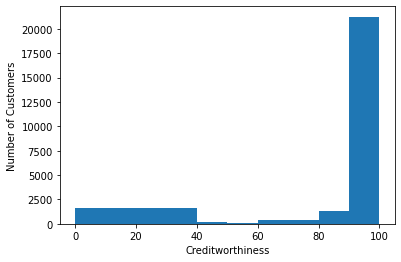

In [116]:
data["Credit"].plot(kind="hist")
plt.ylabel("Number of Customers")
plt.xlabel("Creditworthiness")
plt.show()

In [119]:
thresh_profit = []
for thresh in tqdm(range(0, 101)):
    profit = 0
    for i, S in train_data.iterrows():
        if S["Y"]==0 and S["Credit"]>thresh:
            profit += 10
        if S["Y"]==0 and S["Credit"]<=thresh:
            profit -= 5
        if S["Y"]==1 and S["Credit"]>thresh:
            profit -= 3
        if S["Y"]==1 and S["Credit"]<=thresh:
            profit += 0
    thresh_profit.append(profit)

  0%|          | 0/101 [00:00<?, ?it/s]

In [186]:
thresh_profit[30]

114042

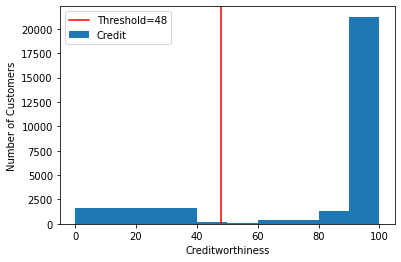

In [183]:
data["Credit"].plot(kind="hist")
plt.ylabel("Number of Customers")
plt.xlabel("Creditworthiness")
plt.axvline(x=48,color='red', label="Threshold=48")
plt.legend()
plt.show()

In [139]:
train_data[(train_data.Protected == 1)].shape[0], train_data[(train_data.Protected == 1) & (train_data.Credit > 48)].shape[0]

(10453, 8196)

In [138]:
train_data[(train_data.Protected == 1)].shape[0], train_data[(train_data.Protected == 1) & (train_data.Credit <= 48)].shape[0]

(10453, 2257)

In [137]:
train_data[(train_data.Protected == 0)].shape[0], train_data[(train_data.Protected == 0) & (train_data.Credit > 48)].shape[0]

(4547, 3467)

In [136]:
train_data[(train_data.Protected == 0)].shape[0], train_data[(train_data.Protected == 0) & (train_data.Credit <= 48)].shape[0]

(4547, 1080)

In [140]:
train_data["Y1"] = train_data.Credit.apply(lambda x: 0 if x<=48 else 1)

C:\Users\sudip\AppData\Local\Temp/ipykernel_19104/120203980.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data["Y1"] = train_data.Credit.apply(lambda x: 0 if x<=48 else 1)


In [141]:
train_data

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,Y,R,Credit,Protected,Y1
23559,210000,2,2,2,34,0,0,0,0,0,0,0,0.000000,100,1,1
23984,110000,1,2,2,25,0,0,0,0,0,0,0,0.000000,100,1,1
15340,30000,2,2,1,43,0,0,0,0,0,0,0,0.000000,100,0,1
20758,140000,1,1,2,30,0,0,0,0,0,0,0,0.000000,100,1,1
3966,60000,2,2,2,25,0,0,2,6,5,4,0,0.472222,52,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5402,50000,1,1,2,34,0,0,0,0,0,0,0,0.000000,100,1,1
1937,360000,2,2,2,27,0,0,0,0,0,0,1,0.000000,28,1,0
14979,50000,1,2,2,55,2,0,0,0,0,0,1,0.055556,40,0,0
18031,120000,1,2,1,40,0,0,0,0,0,0,0,0.000000,100,0,1


In [142]:
young_pos = train_data[(train_data.Y1==1)&(train_data.Protected==1)].shape[0]
old_pos = train_data[(train_data.Y1==1)&(train_data.Protected==0)].shape[0]
old = train_data[train_data.Protected==0].shape[0]
young = train_data[train_data.Protected==1].shape[0]

dis_impact = (old_pos/old)/(young_pos/young)

In [143]:
dis_impact

0.9724513601929761

In [144]:
spd = (old_pos/young_pos) - (old/young)

In [145]:
spd

-0.011983513364827114

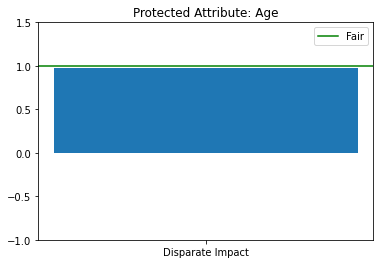

In [153]:
plt.bar(["Disparate Impact"], [dis_impact])
plt.axhline(y=1,color='green', label="Fair")
plt.ylim((-1, 1.5))
plt.legend()
plt.title("Protected Attribute: Age")
plt.show()

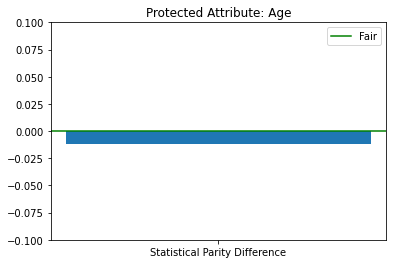

In [158]:
plt.bar(["Statistical Parity Difference"], [spd])
plt.axhline(y=0,color='green', label="Fair")
plt.ylim((-.1, .1))
plt.legend()
plt.title("Protected Attribute: Age")
plt.show()

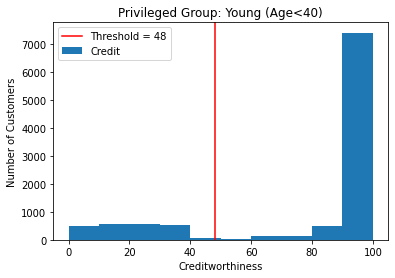

In [175]:
train_data[train_data.Protected==1]["Credit"].plot(kind="hist")
plt.ylabel("Number of Customers")
plt.xlabel("Creditworthiness")
plt.axvline(x=48,color='red', label="Threshold = 48")
plt.title("Privileged Group: Young (Age<40)")
plt.legend()
plt.show()

In [179]:
thresh = 48
profit = 0
for i, S in train_data[train_data.Protected==1].iterrows():
    if S["Y"]==0 and S["Credit"]>thresh:
        profit += 10
    if S["Y"]==0 and S["Credit"]<=thresh:
        profit -= 5
    if S["Y"]==1 and S["Credit"]>thresh:
        profit -= 3
    if S["Y"]==1 and S["Credit"]<=thresh:
        profit += 0
print(profit)

81882


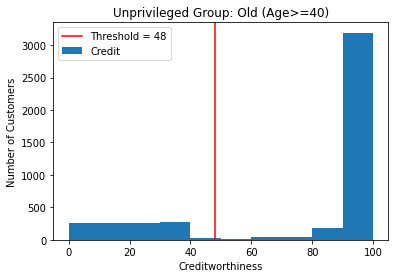

In [176]:
train_data[train_data.Protected==0]["Credit"].plot(kind="hist")
plt.ylabel("Number of Customers")
plt.xlabel("Creditworthiness")
plt.axvline(x=48,color='red', label="Threshold = 48")
plt.title("Unprivileged Group: Old (Age>=40)")
plt.legend()
plt.show()

In [182]:
thresh = 48
profit = 0
for i, S in train_data[train_data.Protected==0].iterrows():
    if S["Y"]==0 and S["Credit"]>thresh:
        profit += 10
    if S["Y"]==0 and S["Credit"]<=thresh:
        profit -= 5
    if S["Y"]==1 and S["Credit"]>thresh:
        profit -= 3
    if S["Y"]==1 and S["Credit"]<=thresh:
        profit += 0
print(profit)

34644


In [185]:
81882+34644

116526